In [1]:
from __future__ import print_function, division
from PyAstronomy import pyasl
import numpy as np
import matplotlib.pylab as plt

In [2]:
# Create a "spectrum" with 0.01 A binning ...
wvl = np.linspace(6000., 6100., 10000)
# ... a gradient in the continuum ...
flux = np.ones(len(wvl)) + (wvl/wvl.min())*0.05
# ... and a Gaussian absoption line
flux -= np.exp( -(wvl-6050.)**2/(2.*0.5**2) )*0.05

In [3]:
# Shift that spectrum redward by 20 km/s using
# "firstlast" as edge handling method.
nflux1, wlprime1 = pyasl.dopplerShift(wvl, flux, 20., edgeHandling="firstlast")

In [4]:
# Shift the red-shifted spectrum blueward by 20 km/s, i.e.,
# back on the initial spectrum.
nflux2, wlprime = pyasl.dopplerShift(wvl, nflux1, -20., \
                        edgeHandling="fillValue", fillValue=1.0)

In [5]:
# Check the maximum difference in the central part
indi = np.arange(len(flux)-200) + 100
print("Maximal difference (without outer 100 bins): ", \
                max(np.abs(flux[indi]-nflux2[indi])))

Maximal difference (without outer 100 bins):  4.860716056764858e-06


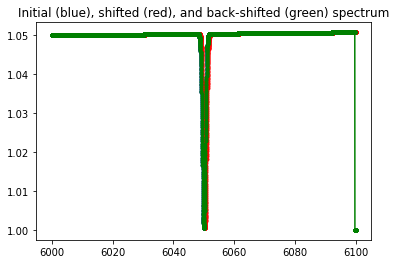

In [6]:
# Plot the outcome
plt.title("Initial (blue), shifted (red), and back-shifted (green) spectrum")
plt.plot(wvl, flux, 'b.-')
plt.plot(wvl, nflux1, 'r.-')
plt.plot(wvl, nflux2, 'g.-')
plt.show()